[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/statistics_by_python.ipynb)

<function matplotlib.pyplot.show>

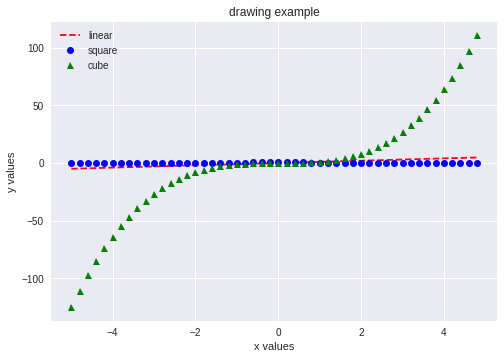

In [11]:
import numpy as np
import matplotlib.pyplot as plt
t=np.arange(-5,5,0.2)
plt.title('drawing example')
plt.plot(t,t,'r--',label='linear')
plt.plot(t,t**2/(t**2+1)**3+1/(t**2+1)**3,'bo',label='square')
plt.plot(t,t**3,'g^',label='cube')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend(loc=2)
plt.show

mean= 500.676 std= 15.4731 var= 239.417


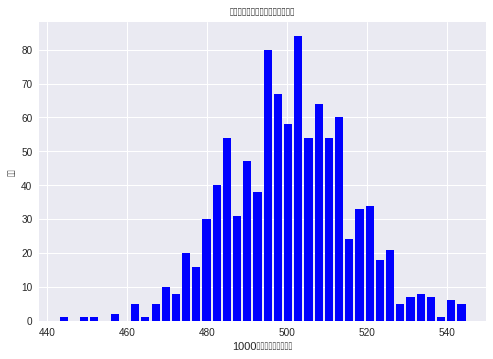

In [21]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
n=1000
p=0.5
b=[]
for i in range(1000):
  v=[1 if u>p else 0 for u in uniform.rvs(loc=0,scale=1,size=n)]
  b.append(sum(v))
  
print('mean=',np.mean(b).round(4),'std=',np.std(b).round(4),'var=',np.var(b).round(4))
plt.hist(b,rwidth=0.8, bins=40, color='blue')
plt.title('コイン投げで表の出る回数の分布')
plt.xlabel('1000回試行中の表の回数')
plt.ylabel('頻度')
plt.show()

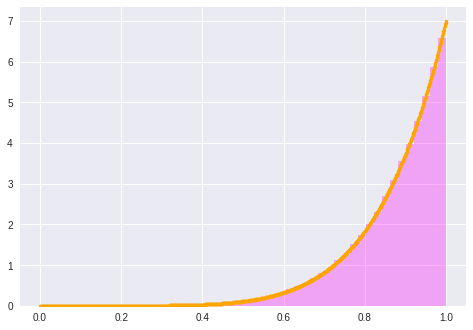

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

nbins=40
np.random.seed()
N=100000
U=scipy.stats.uniform(loc=0.0,scale=1.0).rvs(size=N)
X=U**(1/7)
x=plt.hist(X,nbins,color='magenta',normed=True,alpha=0.3)
x=np.linspace(0,1,1000)
y=7*(x**6)
plt.plot(x,y,'r.-',color='orange',linewidth=.05)
plt.show()
                      
   

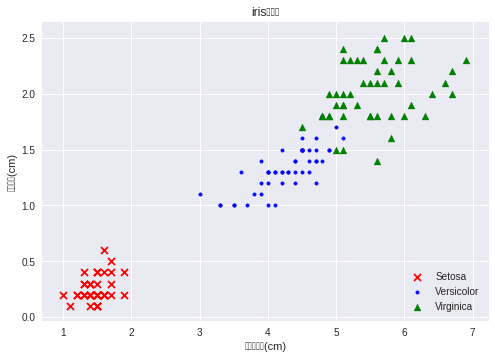

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
iris=load_iris()
species=['Setosa','Versicolor','Virginica']
irispddata=pd.DataFrame(iris.data,columns=iris.feature_names)
irispdtarget=pd.DataFrame(iris.target,columns=['target'])
irispd=pd.concat([irispddata,irispdtarget],axis=1)
irispd0=irispd[irispd.target==0]
irispd1=irispd[irispd.target==1]
irispd2=irispd[irispd.target==2]
plt.scatter(irispd0['petal length (cm)'],irispd0['petal width (cm)'],c='red',label=species[0],marker='x')
plt.scatter(irispd1['petal length (cm)'],irispd1['petal width (cm)'],c='blue',label=species[1],marker='.')
plt.scatter(irispd2['petal length (cm)'],irispd2['petal width (cm)'],c='green',label=species[2],marker='^')
plt.title('iris散布図')
plt.xlabel('花弁の長さ(cm)')
plt.ylabel('花弁の幅(cm)')
plt.legend(loc=4)
plt.show()


主成分 [[ 0.3616 -0.0823  0.8566  0.3588]
 [ 0.6565  0.7297 -0.1758 -0.0747]
 [-0.581   0.5964  0.0725  0.5491]
 [ 0.3173 -0.3241 -0.4797  0.7511]]
平均 [5.8433 3.054  3.7587 1.1987]
分散 [4.2248 0.2422 0.0785 0.0237]
共分散 [[ 0.6857 -0.0393  1.2737  0.5169]
 [-0.0393  0.188  -0.3217 -0.118 ]
 [ 1.2737 -0.3217  3.1132  1.2964]
 [ 0.5169 -0.118   1.2964  0.5824]]
寄与率 [0.9246 0.053  0.0172 0.0052]
累積寄与率 [0.9246 0.9776 0.9948 1.    ]


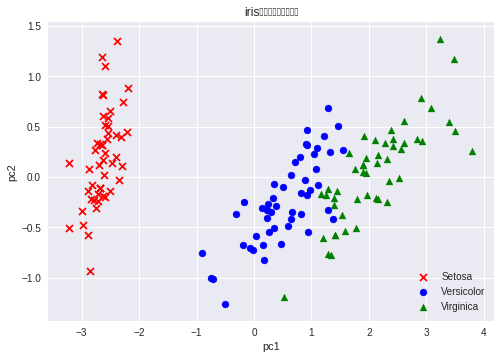

In [9]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
colors=['red','blue','green']
markers=['x','o','^']
iris=load_iris()
species=['Setosa','Versicolor','Virginica']
irisdata=pd.DataFrame(iris.data,columns=iris.feature_names)
iristarget=pd.DataFrame(iris.target,columns=['target'])
irispd=pd.concat([irisdata,iristarget],axis=1)
pca=PCA(n_components=4)
pca.fit(irisdata)
print('主成分',pca.components_.round(4))
print('平均',pca.mean_.round(4))
print('分散',pca.explained_variance_.round(4))
print('共分散',pca.get_covariance().round(4))
print('寄与率',pca.explained_variance_ratio_.round(4))
print('累積寄与率',np.cumsum(pca.explained_variance_ratio_).round(4))
transformed0=pca.transform(irisdata[irispd.target==0])
transformed1=pca.transform(irisdata[irispd.target==1])
transformed2=pca.transform(irisdata[irispd.target==2])
plt.scatter([u[0] for u in transformed0],[u[1] for u in transformed0],c='red',label=species[0],marker='x')
plt.scatter([u[0] for u in transformed1],[u[1] for u in transformed1],c='blue',label=species[1],marker='o')
plt.scatter([u[0] for u in transformed2],[u[1] for u in transformed2],c='green',label=species[2],marker='^')
plt.title('irisデータの主成分分析')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend(loc='best')
plt.show()

主成分 [[ 0.5224 -0.2634  0.5813  0.5656]
 [ 0.3723  0.9256  0.0211  0.0654]
 [-0.721   0.242   0.1409  0.6338]
 [-0.262   0.1241  0.8012 -0.5235]]
平均 [-0. -0. -0. -0.]
分散 [2.9304 0.9274 0.1483 0.0207]
共分散 [[ 1.0067 -0.1101  0.8776  0.8234]
 [-0.1101  1.0067 -0.4233 -0.3589]
 [ 0.8776 -0.4233  1.0067  0.9692]
 [ 0.8234 -0.3589  0.9692  1.0067]]
各次元の寄与率 [0.7277 0.2303 0.0368 0.0052]
累積寄与率 [0.7277 0.958  0.9948 1.    ]
標準偏差         0      1       2      3
0  1.7118  0.963  0.3852  0.144


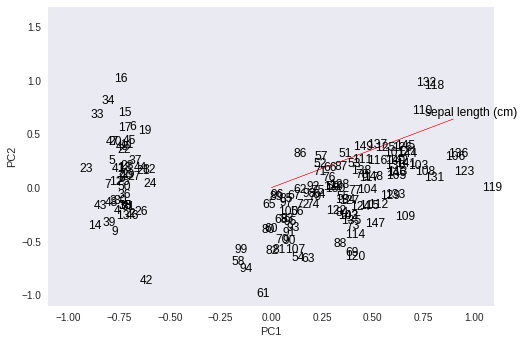

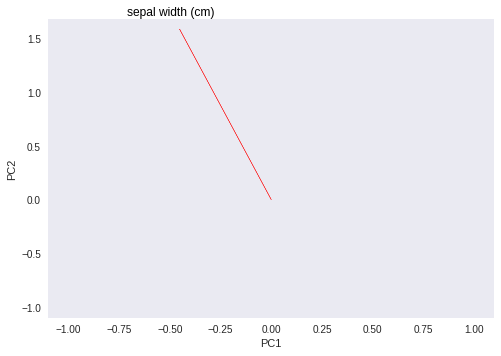

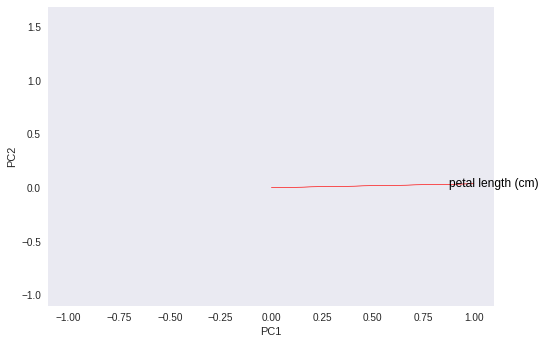

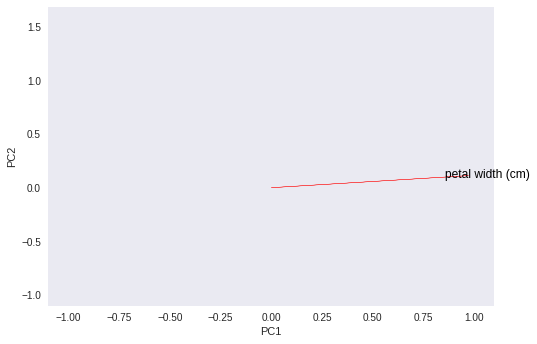

In [25]:
import math
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, FactorAnalysis 
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

def biplot(score, coeff, pcax, pcay, labels=None):
  pca1=pcax-1
  pca2=pcay-1
  xs = score[:,pca1]
  ys = score[:,pca2]
  n=score.shape[1]
  scalex = 2.0/(xs.max()- xs.min())
  scaley = 2.0/(ys.max()- ys.min())
    #plt.scatter(xs*scalex,ys*scaley)
  for i in range(len(xs)):
    plt.text(xs[i]*scalex, ys[i]*scaley, str(i+1), color='k', ha='center', va='center')
  for i in range(n):
    plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=1.0)
    if labels is None:
      plt.text(coeff[i,pca1]* 1.10, coeff[i,pca2] * 1.10, "Var"+str(i+1), color='k', ha='center', va='center')
    else:
      plt.text(coeff[i,pca1]* 1.10, coeff[i,pca2] * 1.10, labels[i], color='k', ha='center', va='center')

    plt.xlim(min(coeff[:,pca1].min()-0.1, -1.1), max(coeff[:,pca1].max()+0.1, 1.1))
    plt.ylim(min(coeff[:,pca2].min()-0.1, -1.1), max(coeff[:,pca2].max()+0.1, 1.1))
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()
    plt.show()

  
iris=load_iris()
species=['Setosa','Versicolor','Virginica']
irisdata=pd.DataFrame(scale(iris.data),columns=iris.feature_names)
iristarget=pd.DataFrame(iris.target,columns=['target'])
irispd=pd.concat([irisdata,iristarget],axis=1)
pca=PCA(n_components=4)
pca.fit(irisdata)
print('主成分',pca.components_.round(4))
print('平均',pca.mean_.round(4))
print('分散',pca.explained_variance_.round(4))
print('共分散',pca.get_covariance().round(4))
print('各次元の寄与率',pca.explained_variance_ratio_.round(4))
print('累積寄与率',np.cumsum(pca.explained_variance_ratio_).round(4))
print('標準偏差',pd.DataFrame([math.sqrt(u) for u in pca.explained_variance_]).T.round(4))
u=pd.DataFrame([[math.sqrt(u) for u in pca.explained_variance_]]*9)
u = pd.DataFrame([ [math.sqrt(u) for u in pca.explained_variance_] ] * 9)
u0 = u[0][0]
pca_components = pd.DataFrame(pca.components_)

x = pca.components_[0,:]*u0
y = pca.components_[1,:]*u0
fuka = (np.array([x, y])).T
biplot(pca.transform(irisdata), fuka, 1,2, labels=irisdata.columns)


主成分 [[ 0.3933  0.4492  0.4494  0.4147  0.5192]
 [-0.6098 -0.3268  0.3074  0.652  -0.0421]
 [ 0.3473 -0.2955  0.7246 -0.1959 -0.4782]
 [ 0.4497 -0.7576 -0.23    0.1736  0.3752]
 [ 0.388   0.1737 -0.3543  0.5783 -0.5994]]
平均 [ 0.  0. -0.  0. -0.]
共分散 [[1.0345 0.3863 0.2964 0.0597 0.4366]
 [0.3863 1.0345 0.3277 0.2253 0.4717]
 [0.2964 0.3277 1.0345 0.4749 0.3412]
 [0.0597 0.2253 0.4749 1.0345 0.4824]
 [0.4366 0.4717 0.3412 0.4824 1.0345]]
各次元の寄与率 [0.4744 0.2046 0.1333 0.1197 0.0679]
累積寄与率 [0.4744 0.679  0.8123 0.9321 1.    ]
標準偏差 [1.5665 1.0288 0.8303 0.787  0.5927]
寄与 [2.4539 1.0584 0.6894 0.6194 0.3513]
偏差         0       1       2      3       4
0  1.5665  1.0288  0.8303  0.787  0.5927
pca.components_ [0.3932876  0.44921209 0.44939673 0.41468847 0.51923927]
pca.components_ [-0.60981624 -0.32679074  0.30743552  0.65195005 -0.04214853]
負荷 [[ 0.6161 -0.9553]
 [ 0.7037 -0.5119]
 [ 0.704   0.4816]
 [ 0.6496  1.0213]
 [ 0.8134 -0.066 ]]


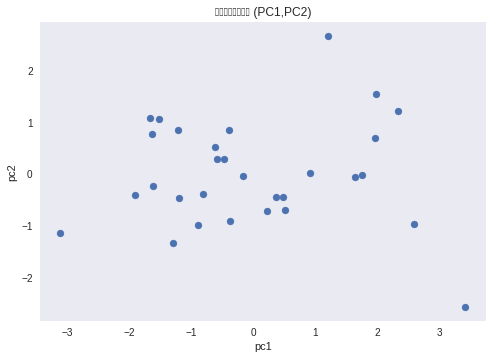

In [6]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

subject = ['国語','社会','数学','理科','英語']['国語','社会','数学','理科','英語']
seiseki_a = np.array([ 
[42,49,42,35,48],[35,48,45,52,46],[44,52,49,38,52],[42,52,43,49,46],
[34,47,45,46,48],[43,52,46,36,48],[41,39,42,39,43],[62,59,59,48,54],
[46,44,47,39,37],[77,61,48,48,67],[49,55,57,48,53],[48,44,42,46,60],
[40,38,45,49,34],[36,36,44,47,47],[54,50,50,45,46],[52,47,61,66,46],
[40,52,36,47,46],[63,28,35,42,48],[44,33,49,20,29],[46,59,50,53,57],
[51,41,60,59,63],[45,39,48,46,45],[34,39,43,50,40],[34,29,45,44,48],
[57,46,54,46,42],[38,42,41,36,41],[43,47,41,53,44],[45,51,53,46,53],
[49,56,54,61,51],[35,38,57,65,57]
])
seiseki_in = pd.DataFrame(seiseki_a, columns=subject)
seiseki = scale(seiseki_in)

pca = PCA()
pca.fit(seiseki)

print('主成分', pca.components_.round(4)) # loadings
print('平均', pca.mean_.round(4)) # loadings
print('共分散', pca.get_covariance().round(4)) # covariance
print('各次元の寄与率', pca.explained_variance_ratio_.round(4))
print('累積寄与率', np.cumsum(pca.explained_variance_ratio_).round(4))
print('標準偏差', np.array([math.sqrt(u) for u in pca.explained_variance_]).round(4))

print('寄与', pca.explained_variance_.round(4))
print('偏差', pd.DataFrame([math.sqrt(u) for u in pca.explained_variance_]).T.round(4))

u = pd.DataFrame([ [math.sqrt(u) for u in pca.explained_variance_] ] * 9)
u0 = u[0][0]
print('pca.components_', pca.components_[0,:])
print('pca.components_', pca.components_[1,:])
pca_components = pd.DataFrame(pca.components_)

x = pca.components_[0,:]*u0
y = pca.components_[1,:]*u0
fuka = (np.array([x, y])).T
print('負荷', fuka.round(4))

transformed = pca.fit_transform(seiseki)
plt.scatter( [u[0] for u in transformed], [u[1] for u in transformed] )
plt.title(u'主成分分析の結果 (PC1,PC2)')
plt.grid()
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()



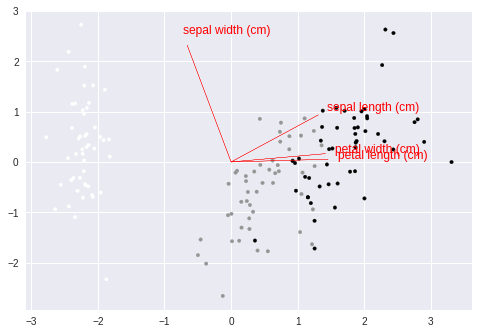

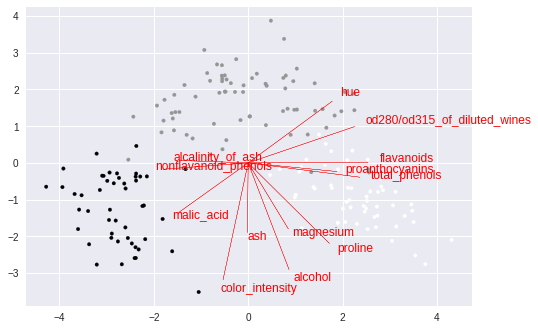

In [7]:
from sklearn.datasets import load_iris, load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

def byplot(dataset, scale=False, arrow_mul=1, text_mul=1.1):
    if scale:
        ss = StandardScaler()
        X = ss.fit_transform(dataset.data)
    else:
        X = dataset.data

    if hasattr(dataset, "feature_names"):
        feature_names = list(dataset.feature_names)
    else:
        feature_names = ["F{0}".format(i)
                         for i in range(dataset.data.shape[1])]

    pca = PCA(n_components=2)
    X = pca.fit_transform(X)

    x_data = X[:,0]
    y_data = X[:,1]

    pc0 = pca.components_[0]
    pc1 = pca.components_[1]

    plt.figure()
    plt.scatter(x_data, y_data,
                c=dataset.target/len(set(dataset.target)),
                marker=".")

    for i in range(pc0.shape[0]):
        plt.arrow(0, 0, 
                  pc0[i]*arrow_mul, pc1[i]*arrow_mul,
                  color='r')
        plt.text(pc0[i]*arrow_mul*text_mul,
                 pc1[i]*arrow_mul*text_mul,
                 feature_names[i],
                 color='r')
    plt.show()

def main():
    iris = load_iris()
    wine = load_wine()

    byplot(iris, arrow_mul=2.5, scale=True)
    byplot(wine, arrow_mul=6, scale=True)

if __name__ == "__main__":
    main()

    国語  社会  数学  理科  英語
0   42  49  42  35  48
1   35  48  45  52  46
2   44  52  49  38  52
3   42  52  43  49  46
4   34  47  45  46  48
5   43  52  46  36  48
6   41  39  42  39  43
7   62  59  59  48  54
8   46  44  47  39  37
9   77  61  48  48  67
10  49  55  57  48  53
11  48  44  42  46  60
12  40  38  45  49  34
13  36  36  44  47  47
14  54  50  50  45  46
15  52  47  61  66  46
16  40  52  36  47  46
17  63  28  35  42  48
18  44  33  49  20  29
19  46  59  50  53  57
20  51  41  60  59  63
21  45  39  48  46  45
22  34  39  43  50  40
23  34  29  45  44  48
24  57  46  54  46  42
25  38  42  41  36  41
26  43  47  41  53  44
27  45  51  53  46  53
28  49  56  54  61  51
29  35  38  57  65  57
荳ｻ謌仙・ [[ 0.3933  0.4492  0.4494  0.4147  0.5192]
 [-0.6098 -0.3268  0.3074  0.652  -0.0421]
 [ 0.3473 -0.2955  0.7246 -0.1959 -0.4782]
 [ 0.4497 -0.7576 -0.23    0.1736  0.3752]
 [ 0.388   0.1737 -0.3543  0.5783 -0.5994]]
蟷ｳ蝮・ [ 0.  0. -0.  0. -0.]
蜈ｱ蛻・淵 [[1.0345 0.3863 0.2964 0.0597 0.

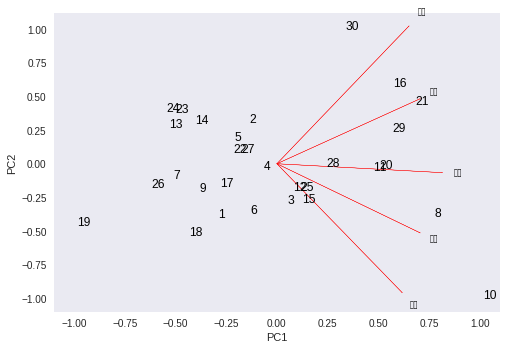

In [17]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

def biplot(score,coeff,pcax,pcay,labels=None):
# https://sukhbinder.wordpress.com/2015/08/05/biplot-with-python/繧医ｊ繧｢繧､繝・い繧貞溽畑
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 2.0/(xs.max()- xs.min())
    scaley = 2.0/(ys.max()- ys.min())
    for i in range(len(xs)):
        plt.text(xs[i]*scalex, ys[i]*scaley, str(i+1), color='k', ha='center', va='center')
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=1.0)
        if labels is None:
            plt.text(coeff[i,pca1]* 1.10, coeff[i,pca2] * 1.10, "Var"+str(i+1), color='k', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* 1.10, coeff[i,pca2] * 1.10, labels[i], color='k', ha='center', va='center')
    plt.xlim(min(coeff[:,pca1].min()-0.1, -1.1), max(coeff[:,pca1].max()+0.1, 1.1))
    plt.ylim(min(coeff[:,pca2].min()-0.1, -1.1), max(coeff[:,pca2].max()+0.1, 1.1))
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()
    plt.show()

subject = ['国語','社会','数学','理科','英語']
seiseki_a = np.array([ 
[42,49,42,35,48],[35,48,45,52,46],[44,52,49,38,52],[42,52,43,49,46],
[34,47,45,46,48],[43,52,46,36,48],[41,39,42,39,43],[62,59,59,48,54],
[46,44,47,39,37],[77,61,48,48,67],[49,55,57,48,53],[48,44,42,46,60],
[40,38,45,49,34],[36,36,44,47,47],[54,50,50,45,46],[52,47,61,66,46],
[40,52,36,47,46],[63,28,35,42,48],[44,33,49,20,29],[46,59,50,53,57],
[51,41,60,59,63],[45,39,48,46,45],[34,39,43,50,40],[34,29,45,44,48],
[57,46,54,46,42],[38,42,41,36,41],[43,47,41,53,44],[45,51,53,46,53],
[49,56,54,61,51],[35,38,57,65,57]
])
seiseki_in = pd.DataFrame(seiseki_a, columns=subject)
print(seiseki_in)
seiseki = scale(seiseki_in)

#pca = PCA(n_components = 2)
pca = PCA()
pca.fit(seiseki)

print('荳ｻ謌仙・', pca.components_.round(4)) # loadings
print('蟷ｳ蝮・', pca.mean_.round(4)) # loadings
print('蜈ｱ蛻・淵', pca.get_covariance().round(4)) # covariance
print('蜷・ｬ｡蜈・・蟇・ｸ守紫', pca.explained_variance_ratio_.round(4))
print('邏ｯ遨榊ｯ・ｸ守紫', np.cumsum(pca.explained_variance_ratio_).round(4))
print('讓呎ｺ門￥蟾ｮ', np.array([math.sqrt(u) for u in pca.explained_variance_]).round(4))

print('蛻・淵', pca.explained_variance_.round(4))
print('讓呎ｺ門￥蟾ｮ', pd.DataFrame([math.sqrt(u) for u in pca.explained_variance_]).T.round(4))

u = pd.DataFrame([ [math.sqrt(u) for u in pca.explained_variance_] ] * 9)
u0 = u[0][0]
pca_components = pd.DataFrame(pca.components_)

x = pca.components_[0,:]*u0
y = pca.components_[1,:]*u0
fuka = (np.array([x, y])).T
print('fuka\n', fuka.round(4))

biplot(pca.transform(seiseki), fuka, 1,2, labels=subject)


逶ｸ髢｢陦悟・
           国語        社会        数学        理科        英語
国語  1.000000  0.373463  0.286529  0.057743  0.422064
社会  0.373463  1.000000  0.316808  0.217825  0.456014
数学  0.286529  0.316808  1.000000  0.459037  0.329818
理科  0.057743  0.217825  0.459037  1.000000  0.466340
英語  0.422064  0.456014  0.329818  0.466340  1.000000

蝗蟄占ｲ闕ｷ驥・     Factor1  Factor2
国語   0.0135   0.6705
社会   0.1844   0.5959
数学   0.4093   0.3715
理科   1.0001   0.0836
英語   0.3962   0.6063

迢ｬ閾ｪ諤ｧ     Uniqueness
国語      0.5502
社会      0.6109
数学      0.6945
理科     -0.0072
英語      0.4755

蝗蟄仙・謨｣                 Factor1  Factor2
SS Loadings      1.3588   1.3173
Proportion Var   0.2718   0.2635
Cumulative Var   0.2718   0.5352

蟇・ｸ守紫
             Factor1   Factor2
蟇・ｸ守紫      0.271766  0.263452
邏ｯ遨榊ｯ・ｸ守紫  0.271766  0.535218

蝗槫ｸｰ豕輔せ繧ｳ繧｢
      Factor1   Factor2
0  -1.304481  0.154610
1   0.668745 -0.645119
2  -1.051467  0.616568
3   0.340259 -0.207135
4  -0.051650 -0.452912
5  -1.216943  0.366027
6  -0.795738 -0.575178


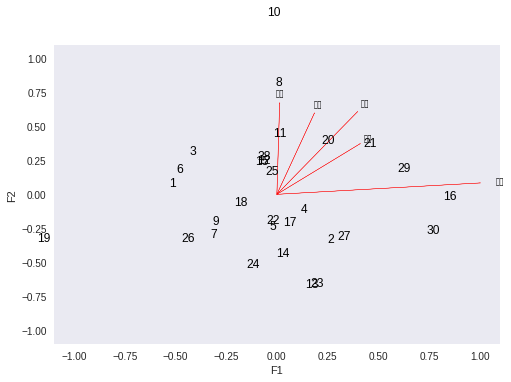

In [19]:
!pip install factor_analyzer

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from factor_analyzer import FactorAnalyzer

def biplot(score,coeff,pcax,pcay,labels=None):
# https://sukhbinder.wordpress.com/2015/08/05/biplot-with-python/繧医ｊ繧｢繧､繝・い繧貞溽畑
    pca1=pcax-1
    pca2=pcay-1
    xs = score.iloc[:,pca1]
    ys = score.iloc[:,pca2]
    n=coeff.shape[0]
    scalex = 2.0/(xs.max()- xs.min())
    scaley = 2.0/(ys.max()- ys.min())
    for i in range(len(xs)):
        plt.text(xs[i]*scalex, ys[i]*scaley, str(i+1), color='k', ha='center', va='center')
    for i in range(n):
        plt.arrow(0, 0, coeff.iloc[i,pca1], coeff.iloc[i,pca2],color='r',alpha=1.0)
        if labels is None:
            plt.text(coeff.iloc[i,pca1]* 1.10, coeff.iloc[i,pca2] * 1.10, "Var"+str(i+1), color='k', ha='center', va='center')
        else:
            plt.text(coeff.iloc[i,pca1]* 1.10, coeff.iloc[i,pca2] * 1.10, labels[i], color='k', ha='center', va='center')
    plt.xlim(min(coeff.iloc[:,pca1].min()-0.1, -1.1), max(coeff.iloc[:,pca1].max()+0.1, 1.1))
    plt.ylim(min(coeff.iloc[:,pca2].min()-0.1, -1.1), max(coeff.iloc[:,pca2].max()+0.1, 1.1))
    plt.xlabel("F{}".format(pcax))
    plt.ylabel("F{}".format(pcay))
    plt.grid()
    plt.show()

subject =  ['国語','社会','数学','理科','英語']
seiseki_a = np.array([
[42,49,42,35,48],[35,48,45,52,46],[44,52,49,38,52],[42,52,43,49,46],
[34,47,45,46,48],[43,52,46,36,48],[41,39,42,39,43],[62,59,59,48,54],
[46,44,47,39,37],[77,61,48,48,67],[49,55,57,48,53],[48,44,42,46,60],
[40,38,45,49,34],[36,36,44,47,47],[54,50,50,45,46],[52,47,61,66,46],
[40,52,36,47,46],[63,28,35,42,48],[44,33,49,20,29],[46,59,50,53,57],
[51,41,60,59,63],[45,39,48,46,45],[34,39,43,50,40],[34,29,45,44,48],
[57,46,54,46,42],[38,42,41,36,41],[43,47,41,53,44],[45,51,53,46,53],
[49,56,54,61,51],[35,38,57,65,57]
])
seiseki_in = pd.DataFrame(seiseki_a, columns=subject)
seiseki = pd.DataFrame(scale(seiseki_in), columns= seiseki_in.columns.values)

fa = FactorAnalyzer()
fa.analyze(seiseki, 2, rotation="varimax")
#fa.analyze(seiseki, 2, rotation="promax")
#fa.analyze(seiseki, 2, rotation=None)

print('逶ｸ髢｢陦悟・\n', seiseki.corr(method='pearson'))
print()
print('蝗蟄占ｲ闕ｷ驥・', fa.loadings.round(4)) # loadings
print()
print('迢ｬ閾ｪ諤ｧ', fa.get_uniqueness().round(4)) # uniqueness
print()
print('蝗蟄仙・謨｣', fa.get_factor_variance().round(4))
print()

##################
#蟇・ｸ守紫
kiyo = np.array([0, 0])
for i in range(len(fa.loadings)):
    u = np.array(fa.loadings.iloc[i])
    kiyo = kiyo + u*u
kiyo = pd.DataFrame(kiyo/len(fa.loadings), index=fa.loadings.columns.values).T
kiyo = kiyo.append(pd.DataFrame(np.cumsum(kiyo, axis=1)), ignore_index=True).rename({0:'蟇・ｸ守紫', 1:'邏ｯ遨榊ｯ・ｸ守紫'})
print('蟇・ｸ守紫\n', kiyo)
print()

#################
def factor_score(X, load):
    Xs = pd.DataFrame(scale(X), columns=X.columns.values)
    ir = np.linalg.inv(Xs.corr(method='pearson'))
    return(pd.DataFrame(np.dot(Xs, np.dot(ir, load)), columns=load.columns.values, index=X.index.values))

score = factor_score(seiseki, fa.loadings)
print('蝗槫ｸｰ豕輔せ繧ｳ繧｢\n', factor_score(seiseki, fa.loadings))
print()

biplot(score, fa.loadings, 1,2, labels=subject)


逶ｸ髢｢陦悟・
            CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS  \
CRIM     1.0000 -0.1995  0.4045 -0.0553  0.4175 -0.2199  0.3508 -0.3779   
ZN      -0.1995  1.0000 -0.5338 -0.0427 -0.5166  0.3120 -0.5695  0.6644   
INDUS    0.4045 -0.5338  1.0000  0.0629  0.7637 -0.3917  0.6448 -0.7080   
CHAS    -0.0553 -0.0427  0.0629  1.0000  0.0912  0.0913  0.0865 -0.0992   
NOX      0.4175 -0.5166  0.7637  0.0912  1.0000 -0.3022  0.7315 -0.7692   
RM      -0.2199  0.3120 -0.3917  0.0913 -0.3022  1.0000 -0.2403  0.2052   
AGE      0.3508 -0.5695  0.6448  0.0865  0.7315 -0.2403  1.0000 -0.7479   
DIS     -0.3779  0.6644 -0.7080 -0.0992 -0.7692  0.2052 -0.7479  1.0000   
RAD      0.6220 -0.3119  0.5951 -0.0074  0.6114 -0.2098  0.4560 -0.4946   
TAX      0.5796 -0.3146  0.7208 -0.0356  0.6680 -0.2920  0.5065 -0.5344   
PTRATIO  0.2883 -0.3917  0.3832 -0.1215  0.1889 -0.3555  0.2615 -0.2325   
B       -0.3774  0.1755 -0.3570  0.0488 -0.3801  0.1281 -0.2735  0.2915   
LSTAT    0.4522 

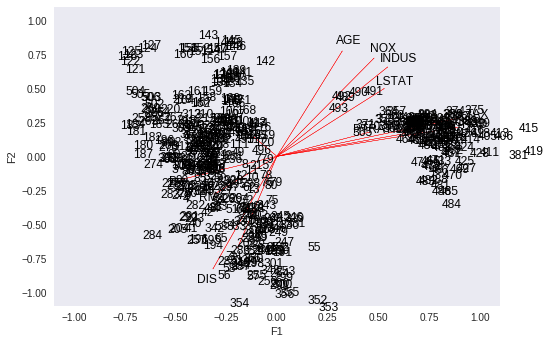

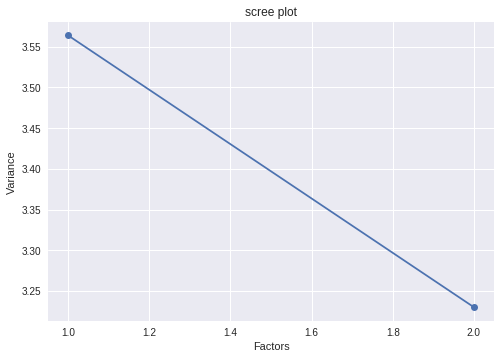

In [20]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import scale
from factor_analyzer import FactorAnalyzer

def biplot(score,coeff,pcax,pcay,labels=None):
# https://sukhbinder.wordpress.com/2015/08/05/biplot-with-python/繧医ｊ繧｢繧､繝・い繧貞溽畑
    pca1=pcax-1
    pca2=pcay-1
    xs = score.iloc[:,pca1]
    ys = score.iloc[:,pca2]
    n=coeff.shape[0]
    scalex = 2.0/(xs.max()- xs.min())
    scaley = 2.0/(ys.max()- ys.min())
    for i in range(len(xs)):
        plt.text(xs[i]*scalex, ys[i]*scaley, str(i+1), color='k', ha='center', va='center')
    for i in range(n):
        plt.arrow(0, 0, coeff.iloc[i,pca1], coeff.iloc[i,pca2],color='r',alpha=1.0)
        if labels is None:
            plt.text(coeff.iloc[i,pca1]* 1.10, coeff.iloc[i,pca2] * 1.10, "Var"+str(i+1), color='k', ha='center', va='center')
        else:
            plt.text(coeff.iloc[i,pca1]* 1.10, coeff.iloc[i,pca2] * 1.10, labels[i], color='k', ha='center', va='center')
    plt.xlim(min(coeff.iloc[:,pca1].min()-0.1, -1.1), max(coeff.iloc[:,pca1].max()+0.1, 1.1))
    plt.ylim(min(coeff.iloc[:,pca2].min()-0.1, -1.1), max(coeff.iloc[:,pca2].max()+0.1, 1.1))
    plt.xlabel("F{}".format(pcax))
    plt.ylabel("F{}".format(pcay))
    plt.grid()
    plt.show()

dset = datasets.load_boston()
boston = pd.DataFrame(dset.data)
boston.columns = dset.feature_names
target = pd.DataFrame(dset.target)
boston = pd.DataFrame(scale(boston), columns= boston.columns)

fa = FactorAnalyzer()
fa.analyze(boston, 2, rotation="varimax")  # varimax蝗櫁ｻ｢繧偵☆繧句ｴ蜷・#fa.analyze(boston, 2, rotation="promax")  # promax蝗櫁ｻ｢繧偵☆繧句ｴ蜷・#fa.analyze(boston, 2, rotation=None)      # 蝗櫁ｻ｢繧偵＠縺ｪ縺・ｴ蜷・#fa.analyze(boston, 7, rotation="varimax") # scree plot縺ｮ譎ゅ↓7蝗蟄舌∪縺ｧ邂怜・

print('逶ｸ髢｢陦悟・\n', boston.corr(method='pearson').round(4))
print()
print('蝗蟄占ｲ闕ｷ驥・', fa.loadings.round(4)) # loadings
print()
print('迢ｬ閾ｪ諤ｧ', fa.get_uniqueness().round(4)) # uniqueness
print()
print('蝗蟄仙・謨｣', fa.get_factor_variance().round(4))
print()

#################
def factor_score(X, load):
    Xs = pd.DataFrame(scale(X), columns=X.columns.values)
    ir = np.linalg.inv(Xs.corr(method='pearson'))
    return(pd.DataFrame(np.dot(Xs, np.dot(ir, load)), columns=load.columns.values, index=X.index.values))

score = factor_score(boston, fa.loadings)
print('蝗槫ｸｰ豕輔せ繧ｳ繧｢\n', factor_score(boston, fa.loadings).round(4))
print()

biplot(score, fa.loadings, 1,2, labels=boston.columns)

# 繧ｹ繧ｯ繝ｪ繝ｼ繝励Ο繝・ヨ繧呈緒縺丞ｴ蜷医∝屏蟄先焚繧・縺ｾ縺ｧ蠅励ｄ縺励◆荳翫〒縲√％縺ｮ驛ｨ蛻・・繧ｳ繝｡繝ｳ繝医ｒ螟悶☆縲・'''
u = fa.get_factor_variance()
y = u[0:1].values[0]
x = np.arange(len(y))+1
plt.plot(x, y, "o-")
plt.title("scree plot")
plt.xlabel("Factors")
plt.ylabel("Variance")
plt.show()
